# EDA

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

from datetime import datetime


In [5]:
# Пути
PROCESSED_PATH = 'data/processed'

# Загрузка объединённого датасета
orders_full = pd.read_csv(os.path.join(PROCESSED_PATH, 'orders_full.csv'))


# Динамика заказов по месяцам

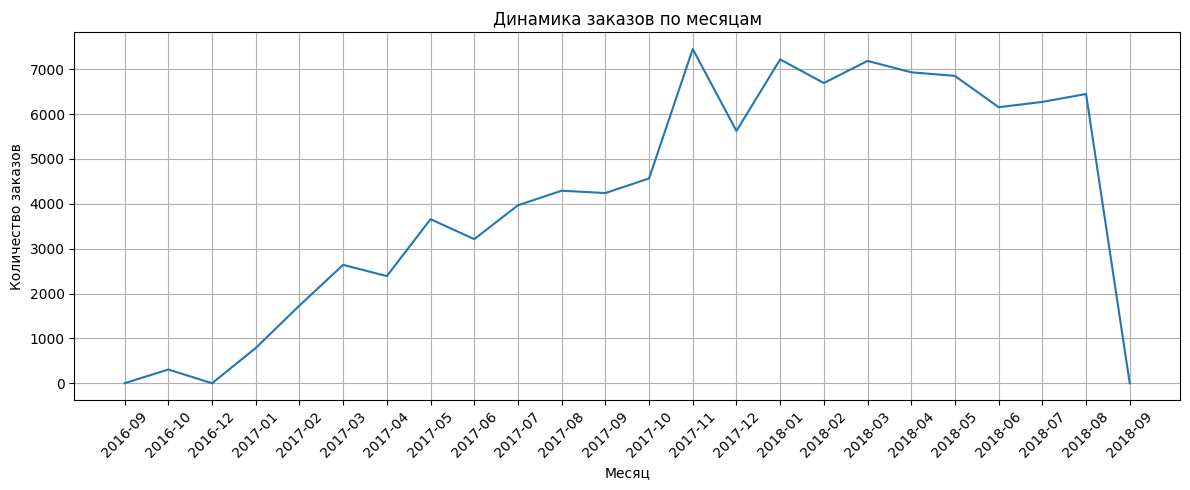

In [6]:
# Динамика заказов по месяцам
orders_full['order_purchase_timestamp'] = pd.to_datetime(orders_full['order_purchase_timestamp'])

# Извлечение месяца
orders_full['order_month'] = orders_full['order_purchase_timestamp'].dt.to_period('M')

# Группировка по месяцам
orders_by_month = orders_full.groupby('order_month')['order_id'].nunique().reset_index()
orders_by_month['order_month'] = orders_by_month['order_month'].astype(str)

# Построение графика
plt.figure(figsize=(12, 5))
sns.lineplot(data=orders_by_month, x='order_month', y='order_id')
plt.title('Динамика заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# ТОП-10 категорий

/var/folders/h2/dsmg5l1j0ts5vnwjkk8_hcy40000gn/T/ipykernel_73397/3239726113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


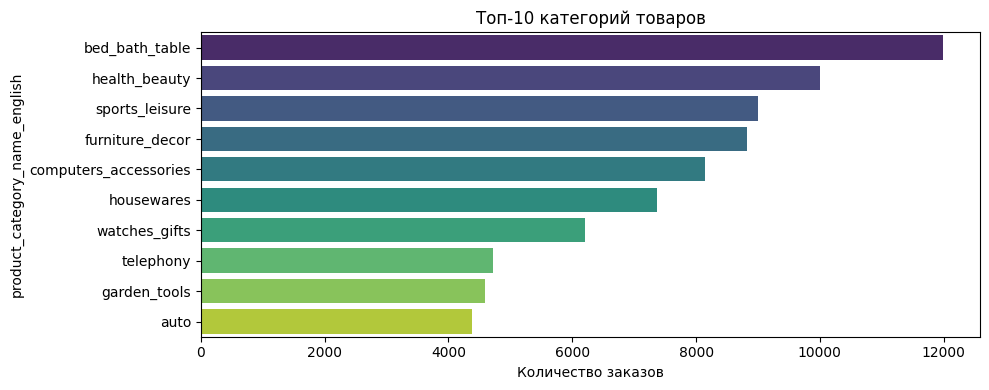

In [7]:
top_categories = orders_full['product_category_name_english'].value_counts().head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Топ-10 категорий товаров')
plt.xlabel('Количество заказов')
plt.tight_layout()
plt.show()


# Распределение суммы платежей

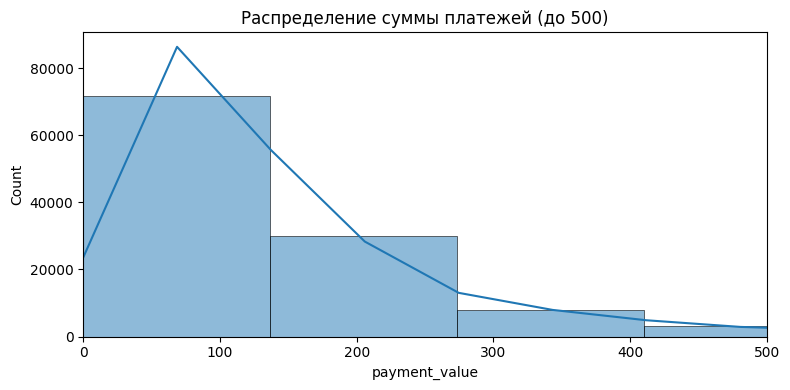

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(orders_full['payment_value'], bins=100, kde=True)
plt.xlim(0, 500)
plt.title('Распределение суммы платежей (до 500)')
plt.tight_layout()
plt.show()


# География клиентов

/var/folders/h2/dsmg5l1j0ts5vnwjkk8_hcy40000gn/T/ipykernel_73397/1560044991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='cubehelix')


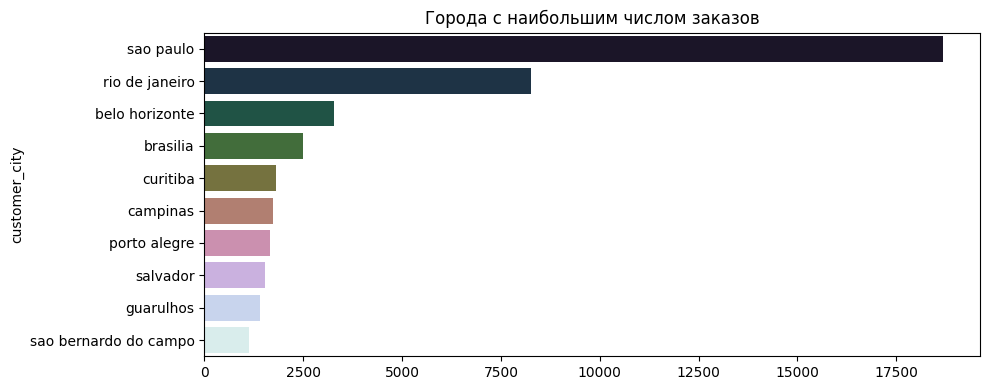

In [9]:
top_cities = orders_full['customer_city'].value_counts().head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='cubehelix')
plt.title('Города с наибольшим числом заказов')
plt.tight_layout()
plt.show()



# Средний чек по категориям

/var/folders/h2/dsmg5l1j0ts5vnwjkk8_hcy40000gn/T/ipykernel_73397/3007271783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_payment_by_category.values, y=avg_payment_by_category.index, palette='rocket')


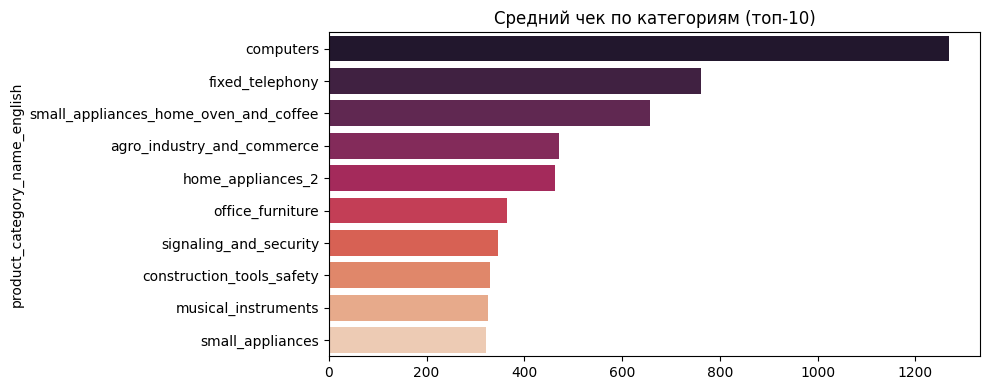

In [10]:
avg_payment_by_category = orders_full.groupby('product_category_name_english')['payment_value'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=avg_payment_by_category.values, y=avg_payment_by_category.index, palette='rocket')
plt.title('Средний чек по категориям (топ-10)')
plt.tight_layout()
plt.show()


# RFM-распределение (подготовка для дальнейшего анализа)

In [13]:
ref_date = orders_full['order_purchase_timestamp'].max()
rfm = orders_full.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (ref_date - pd.to_datetime(x.max())).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
})

# просмотр распределения RFM-параметров
rfm.describe()


,Recency,Frequency,Monetary
count,95378.000000,95378.000000,95378.000000
mean,242.607184,1.033949,213.953375
std,153.155065,0.210796,645.711271
min,0.000000,1.000000,0.000000
25%,118.000000,1.000000,64.000000
50%,223.000000,1.000000,113.345000
75%,352.000000,1.000000,203.300000
max,728.000000,16.000000,109312.640000
